# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [2]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'

## Reading input data

In [3]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 12
Flow matrix:
 [[ 0.  1.  2.  3.  1.  2.  3.  4.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  2.  1.  2.  3.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  3.  2.  1.  2.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  4.  3.  2.  1.  5.  4.  3.  2.]
 [ 1.  2.  3.  4.  0.  1.  2.  3.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  1.  0.  1.  2.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  2.  1.  0.  1.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  3.  2.  1.  0.  4.  3.  2.  1.]
 [ 2.  3.  4.  5.  1.  2.  3.  4.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  2.  1.  2.  3.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  3.  2.  1.  2.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  4.  3.  2.  1.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.   5.   2.   4.   1.   0.   0.   6.   2.   1.   1.   1.]
 [  5.   0.   3.   0.   2.   2.   2.   0.   4.   5.   0.   0.]
 [  2.   3.   0.   0.   0.   0.   0.   5.   5.   2.   2.   2.]
 [  4.   0.   0.   0.   5.   2.   2.  10.   0.   0.   5.   5.]
 [  1.   2.   0.   5.   0.  10.   0.   0.   0.   5.   1.   1.]
 [  0.   2.   0.   2.  

## Objective function

In [4]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [5]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

In [6]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

62.258999824523926
604.0 [ 7  6 11  0  3 10  8  2  4  5  9  1]


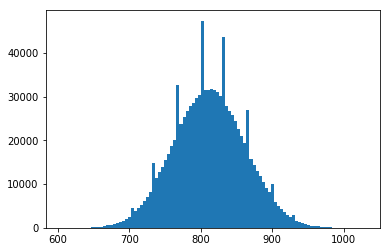

811.921768 49.7013396173


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [8]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [9]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

45.28400015830994 578.0


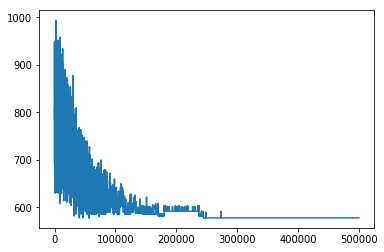

In [10]:
plt.figure()
plt.plot(costs)
plt.show()